In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib
import matplotlib.font_manager as fm
import os
fpath = '/Library/Fonts/Myriad-Pro_31655.ttf'
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]
axis_font = {'fontname':fname, 'fontproperties':prop}

# Part 1: Load in data

In [2]:
cnn_on = pd.read_csv('regression_table_cross_vals/cv_scores_on_twolayerconv.csv', header = None)
cnn_off = pd.read_csv('regression_table_cross_vals/cv_scores_off_twolayerconv.csv', header = None)
scramb_on = pd.read_csv('regression_table_cross_vals/cv_scores_scrambled_on_twolayerconv.csv', header = None)
scramb_off = pd.read_csv('regression_table_cross_vals/cv_scores_scrambled_off_twolayerconv.csv', header = None)

In [3]:
metric_names = ['r2_score', 'pearson_corr', 'spearman_corr', 'mse_val', 'mae_val']

cnn_on.columns = metric_names
cnn_on['model'] = 'cnn_on'
cnn_off.columns = metric_names
cnn_off['model'] = 'cnn_off'

scramb_on.columns = metric_names
scramb_on['model'] = 'scram_on'
scramb_off.columns = metric_names
scramb_off['model'] = 'scram_off'

In [4]:
full_df = pd.concat([cnn_on, scramb_on, cnn_off, scramb_off])
full_df
full_df.to_csv('cleaned_csvs/5_fold_cv_for_figure3_regression.csv')

# Part 2: Make plots

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


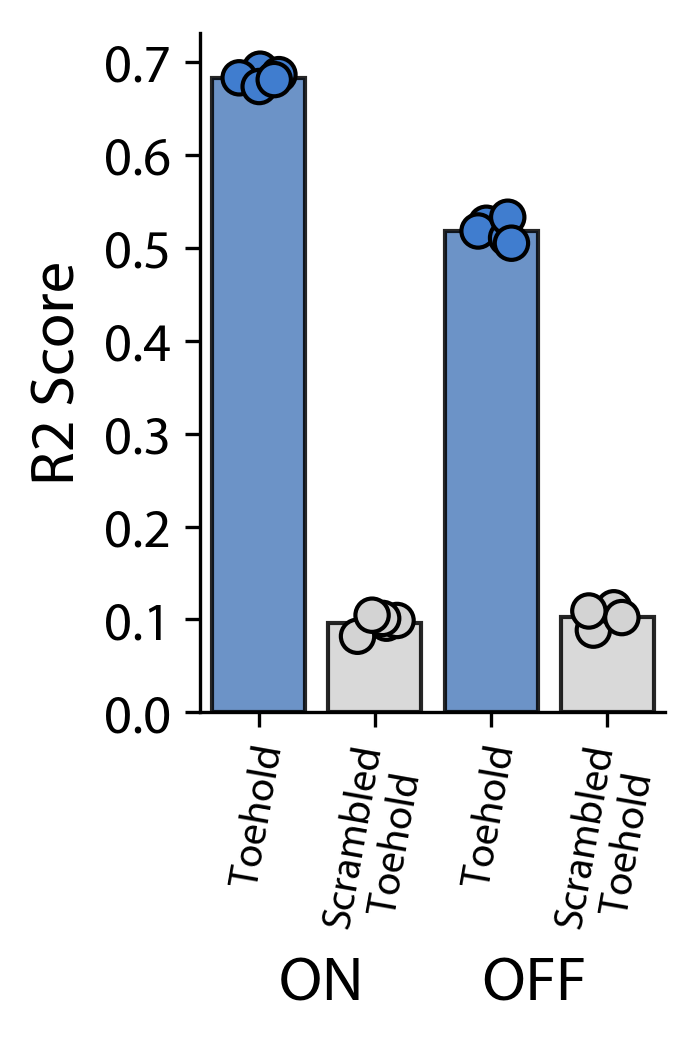

In [5]:
fig, ax = plt.subplots(figsize = (2,3), dpi = 300)

blue = '#407DCF'
grey = 'lightgray'
colors = [blue, grey, blue, grey]
g = sns.barplot(x="model", y="r2_score", data=full_df, palette = colors, edgecolor = 'black', alpha = 0.85)
sns.stripplot(x="model", y="r2_score", data=full_df, alpha=1, palette = colors, size = 8, 
               edgecolor = 'black', linewidth = 1,  jitter = 0.2, marker = 'o')

g.set_yticklabels([np.round(x, 2) for x in g.get_yticks()], **axis_font, fontsize = 13)
g.set_ylabel('R2 Score', **axis_font, fontsize = 15)
g.set_xticklabels(['Toehold', 'Scrambled\nToehold', 'Toehold', 'Scrambled\nToehold'], rotation = 80, **axis_font, fontsize = 10)
g.set_xlabel('ON         OFF', **axis_font, fontsize = 15)

ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

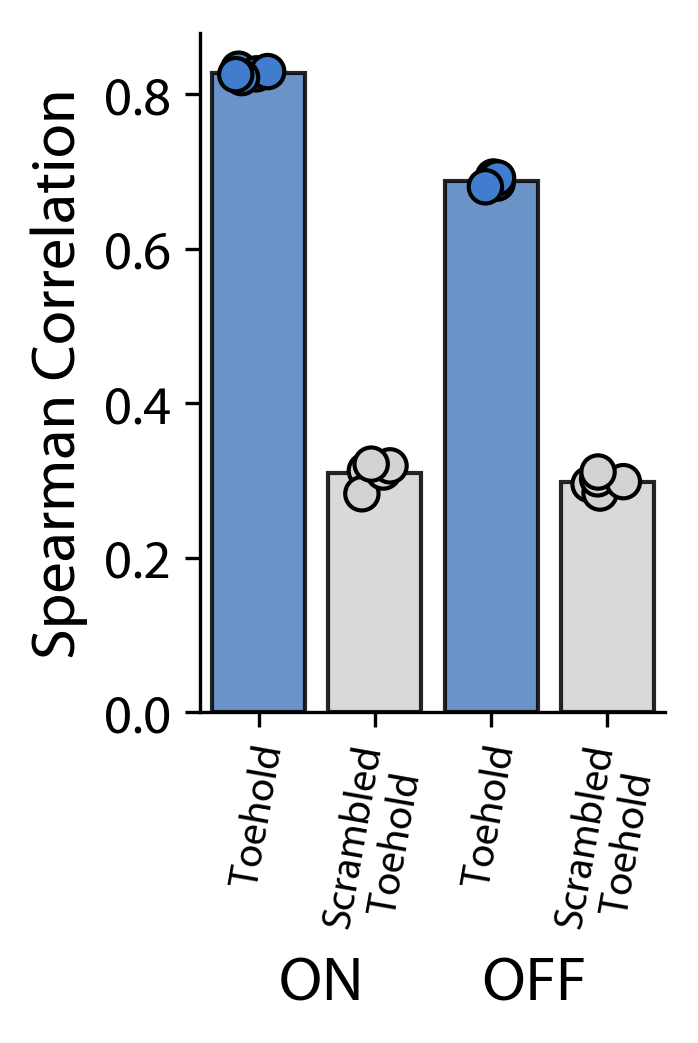

In [6]:
fig, ax = plt.subplots(figsize = (2,3), dpi = 300)

g = sns.barplot(x="model", y="spearman_corr", data=full_df, palette = colors, edgecolor = 'black', alpha = 0.85)
sns.stripplot(x="model", y="spearman_corr", data=full_df, alpha=1, palette = colors, size = 8, 
               edgecolor = 'black', linewidth = 1,  jitter = 0.2, marker = 'o')

g.set_yticklabels([np.round(x, 2) for x in g.get_yticks()], **axis_font, fontsize = 13)
g.set_ylabel('Spearman Correlation', **axis_font, fontsize = 15)
g.set_xticklabels(['Toehold', 'Scrambled\nToehold', 'Toehold', 'Scrambled\nToehold'], rotation = 80, **axis_font, fontsize = 10)
g.set_xlabel('ON         OFF', **axis_font, fontsize = 15)

ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

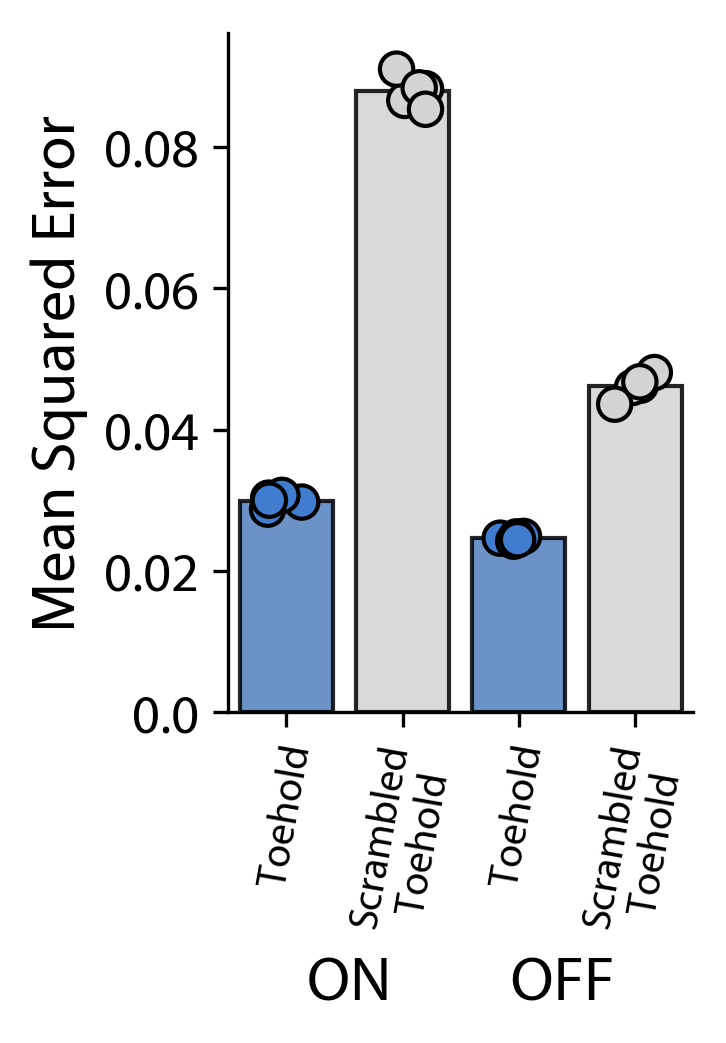

In [7]:
fig, ax = plt.subplots(figsize = (2,3), dpi = 300)

g = sns.barplot(x="model", y="mse_val", data=full_df, palette = colors, edgecolor = 'black', alpha = 0.85)
sns.stripplot(x="model", y="mse_val", data=full_df, alpha=1, palette = colors, size = 8, 
               edgecolor = 'black', linewidth = 1,  jitter = 0.2, marker = 'o')

g.set_yticklabels([np.round(x, 2) for x in g.get_yticks()], **axis_font, fontsize = 13)
g.set_ylabel('Mean Squared Error', **axis_font, fontsize = 15)
g.set_xticklabels(['Toehold', 'Scrambled\nToehold', 'Toehold', 'Scrambled\nToehold'], rotation = 80, **axis_font, fontsize = 10)
g.set_xlabel('ON         OFF', **axis_font, fontsize = 15)

ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()